In [1]:
import time
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**感觉这个东西有点像学校公共计算平台的运行方式**

In [2]:
train_original = pd.read_csv("train.csv")

In [3]:
train_original.shape

(501730, 15)

In [4]:
train_original.head()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
0,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548540000,NaN,NaN
1,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548840000,NaN,NaN
2,21671,256,available,sql,x86_64,0,0,0,0,0,0,1,1582549500000,NaN,NaN
3,21671,256,available,sql,x86_64,0,0,0,0,4,0,0,1582549500000,NaN,NaN
4,297,16,available,sql,x86_64,0,0,0,0,7,0,0,1582549500000,NaN,NaN


In [5]:
train_original.QUEUE_ID.nunique()

43

**复制数据集**

In [6]:
data = train_original.copy(deep=True)

In [7]:
data.isnull().sum()

QUEUE_ID                  0
CU                        0
STATUS                    0
QUEUE_TYPE                0
PLATFORM                  0
CPU_USAGE                 0
MEM_USAGE                 0
LAUNCHING_JOB_NUMS        0
RUNNING_JOB_NUMS          0
SUCCEED_JOB_NUMS          0
CANCELLED_JOB_NUMS        0
FAILED_JOB_NUMS           0
DOTTING_TIME              0
RESOURCE_TYPE         33095
DISK_USAGE            33095
dtype: int64

In [8]:
data.QUEUE_ID.nunique()

43

In [9]:
np.sort(data.QUEUE_ID.unique())

array([    2,     3,     4,    26,    27,    36,   233,   281,   287,
         291,   293,   297,   298, 20889, 21487, 21671, 21673, 21825,
       81221, 82695, 82697, 82929, 83109, 83609, 84151, 84387, 84907,
       85101, 85153, 85265, 85267, 85617, 85619, 85693, 85731, 85781,
       85915, 85933, 85977, 86085, 86865, 86867, 87139], dtype=int64)

**QUEUE_ID的值的大小会暗示什么信息吗？**

In [10]:
data.CU.nunique()

10

**CPU配置（核数）有10种**

In [11]:
data[['CU','QUEUE_ID']].groupby(['CU','QUEUE_ID']).count()

Empty DataFrame
Columns: []
Index: [(16, 2), (16, 3), (16, 4), (16, 36), (16, 233), (16, 287), (16, 297), (16, 298), (16, 81221), (16, 82695), (16, 82697), (16, 83109), (16, 83609), (16, 84151), (16, 84387), (16, 84907), (16, 85617), (16, 85619), (16, 85693), (16, 85731), (16, 85933), (16, 85977), (16, 87139), (32, 85977), (48, 85977), (64, 281), (64, 20889), (64, 21487), (64, 21673), (64, 82929), (64, 85101), (64, 85153), (64, 85265), (64, 85267), (64, 85781), (64, 85915), (64, 85977), (64, 86085), (64, 86865), (112, 85977), (128, 85977), (256, 21671), (256, 21825), (256, 86867), (512, 27), (960, 293), (1024, 26), (1024, 291)]

**并不是QUEUE_ID越大，核数越多（无明显直接关系）**

In [12]:
data.STATUS.unique()

array(['available', 'assigning', 'assigned', 'suspended'], dtype=object)

**感觉suspended可能是一种特殊的状态**

In [13]:
data[['STATUS','QUEUE_ID']].groupby(['STATUS']).count()

,QUEUE_ID
STATUS,
assigned,4
assigning,85
available,501639
suspended,2


**啊这...这三类也太少了吧**

In [14]:
data.QUEUE_TYPE.unique()

array(['sql', 'general', 'spark'], dtype=object)

In [15]:
data[['QUEUE_TYPE','QUEUE_ID']].groupby(['QUEUE_TYPE']).count()

,QUEUE_ID
QUEUE_TYPE,
general,196418
spark,14005
sql,291307


**可以 这个比较平均一点**

In [16]:
data.PLATFORM.unique()

array(['x86_64', 'aarch64'], dtype=object)

In [17]:
# 平台
data[['PLATFORM','QUEUE_ID']].groupby(['PLATFORM']).count()

,QUEUE_ID
PLATFORM,
aarch64,6195
x86_64,495535


In [18]:
# 内存使用量
data.MEM_USAGE.nunique()

100

In [19]:
group1 = data[['MEM_USAGE','QUEUE_ID']].groupby(['MEM_USAGE']).count()

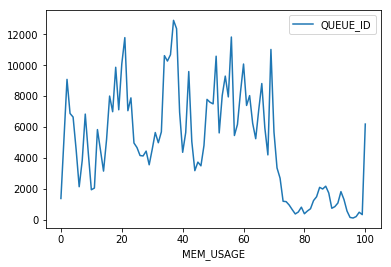

In [20]:
group1.plot()

In [21]:
# 运行中的作业数
np.sort(data.RUNNING_JOB_NUMS.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       71], dtype=int64)

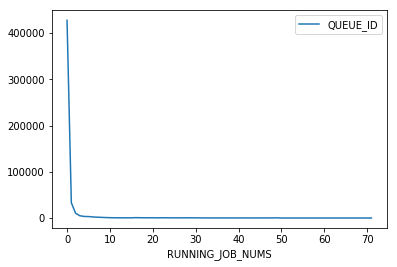

In [22]:
group2 = data[['RUNNING_JOB_NUMS','QUEUE_ID']].groupby(['RUNNING_JOB_NUMS']).count()

group2.plot()

**长尾的**

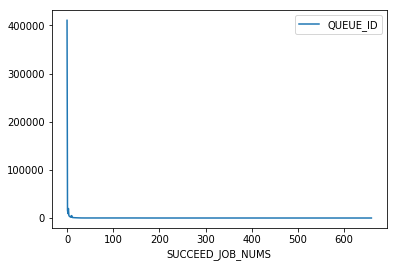

In [23]:
# 已完成的作业数

group3 = data[['SUCCEED_JOB_NUMS','QUEUE_ID']].groupby(['SUCCEED_JOB_NUMS']).count()

group3.plot()

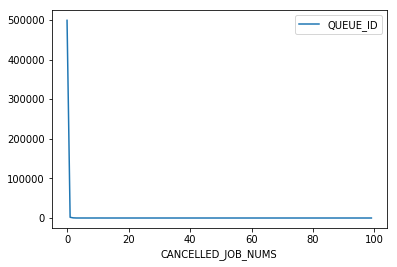

In [24]:
# 已取消的作业数

group4 = data[['CANCELLED_JOB_NUMS','QUEUE_ID']].groupby(['CANCELLED_JOB_NUMS']).count()

group4.plot()

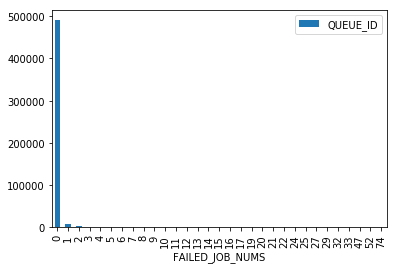

In [25]:
# 已失败的作业数

group5 = data[['FAILED_JOB_NUMS','QUEUE_ID']].groupby(['FAILED_JOB_NUMS']).count()

group5.plot(kind='bar')

In [26]:
# 转换unix时间为一般时间

timestamp = 1585147137000

def local_time(timestamp):
    # 转换成localtime，不要忘记除以1000
    time_local = datetime.datetime.fromtimestamp(timestamp / 1000)
    return time_local

print(local_time(timestamp))
print(local_time(timestamp).day)

2020-03-25 22:38:57
25


In [27]:
data['date_time'] = data['DOTTING_TIME'].map(lambda x: local_time(x))

In [28]:
data.head()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time
0,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548540000,NaN,NaN,2020-02-24 20:49:00
1,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548840000,NaN,NaN,2020-02-24 20:54:00
2,21671,256,available,sql,x86_64,0,0,0,0,0,0,1,1582549500000,NaN,NaN,2020-02-24 21:05:00
3,21671,256,available,sql,x86_64,0,0,0,0,4,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00
4,297,16,available,sql,x86_64,0,0,0,0,7,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00


In [29]:
data.RESOURCE_TYPE.unique()

array([nan, 'vm', 'container'], dtype=object)

In [30]:
data[['RESOURCE_TYPE','QUEUE_ID']].groupby(['RESOURCE_TYPE']).count()

,QUEUE_ID
RESOURCE_TYPE,
container,14410
vm,454225


In [31]:
data.DISK_USAGE.unique()

array([nan,  0., 17.,  8.,  9., 20., 23., 24., 25., 26., 27., 28., 29.,
        5.,  2.,  6.,  7., 19., 18.,  4., 10., 21.])

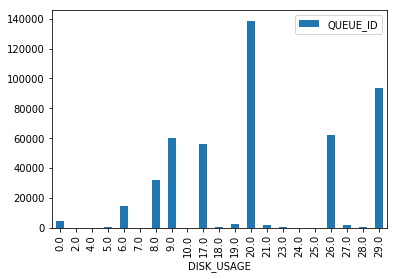

In [32]:
group6 = data[['DISK_USAGE','QUEUE_ID']].groupby(['DISK_USAGE']).count()

group6.plot(kind='bar')

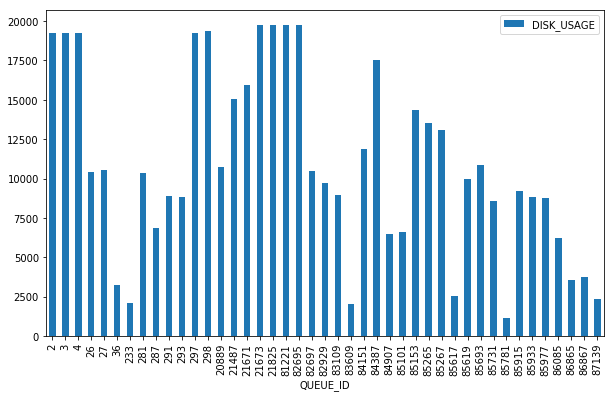

In [33]:
# 查看QUEUE_ID

group7 = data[['DISK_USAGE','QUEUE_ID']].groupby(['QUEUE_ID']).count()

group7.plot(kind='bar', figsize=(10,6))

In [34]:
test = pd.read_csv('evaluation_public.csv')

In [35]:
test.QUEUE_ID.unique()

array([  297, 85153,   291, 21487, 85265,     4,     2, 81221,   287,
       85693,     3,   293,    36,    26,   281, 83609, 21671,    27,
         233, 85101, 85933, 21673,   298], dtype=int64)

In [36]:
time_features = ['year', 'month', 'day', 'hour']

for feat in time_features:
    data[feat] = data['date_time'].map(lambda x : getattr(x, feat))

In [37]:
data.head()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
0,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548540000,NaN,NaN,2020-02-24 20:49:00,2020,2,24,20
1,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548840000,NaN,NaN,2020-02-24 20:54:00,2020,2,24,20
2,21671,256,available,sql,x86_64,0,0,0,0,0,0,1,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21
3,21671,256,available,sql,x86_64,0,0,0,0,4,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21
4,297,16,available,sql,x86_64,0,0,0,0,7,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21


In [38]:
data.year.unique()

array([2020], dtype=int64)

In [39]:
data.month.unique()

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [40]:
data.hour.unique()

array([20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19], dtype=int64)

In [41]:
test['date_time'] = test['DOTTING_TIME'].map(lambda x: local_time(x))

In [42]:
time_features = ['year', 'month', 'day', 'hour']

for feat in time_features:
    test[feat] = test['date_time'].map(lambda x : getattr(x, feat))

In [43]:
test.month.unique()

array([ 9,  2,  6, 10,  8,  1,  3, 11,  4,  7, 12,  5], dtype=int64)

**看要预测的两个变量的情况**

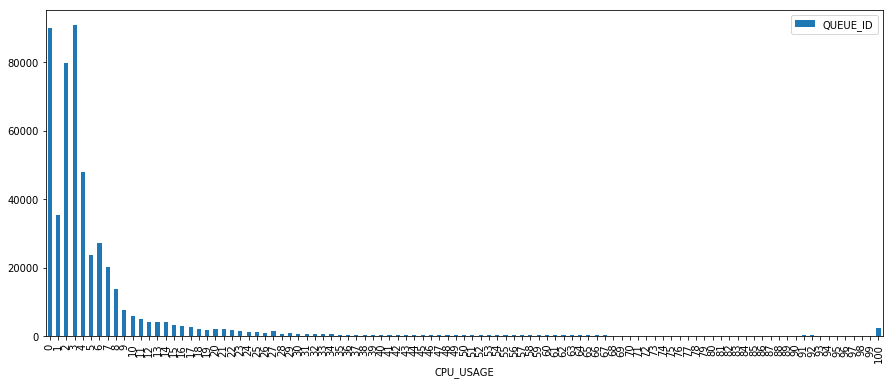

In [44]:
# 查看CPU USAGE

group7 = data[['CPU_USAGE','QUEUE_ID']].groupby(['CPU_USAGE']).count()

group7.plot(kind='bar', figsize=(15,6))

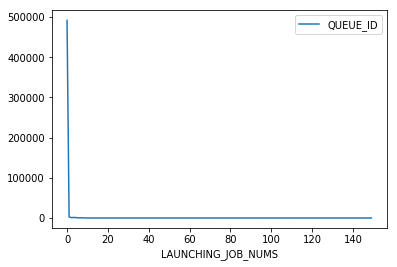

In [45]:
group8 = data[['LAUNCHING_JOB_NUMS','QUEUE_ID']].groupby(['LAUNCHING_JOB_NUMS']).count()

group8.plot()

In [46]:
data[data.QUEUE_ID == 26].head(50)

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
134410,26,1024,available,sql,x86_64,0,0,1,0,0,0,0,1590805020000,vm,0.0,2020-05-30 10:17:00,2020,5,30,10
134423,26,1024,available,sql,x86_64,1,2,0,0,1,0,0,1590805320000,vm,20.0,2020-05-30 10:22:00,2020,5,30,10
134441,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590805620000,vm,20.0,2020-05-30 10:27:00,2020,5,30,10
134459,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590805920000,vm,20.0,2020-05-30 10:32:00,2020,5,30,10
134464,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590806220000,vm,20.0,2020-05-30 10:37:00,2020,5,30,10
134482,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590806520000,vm,20.0,2020-05-30 10:42:00,2020,5,30,10
134500,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590806820000,vm,20.0,2020-05-30 10:47:00,2020,5,30,10
134518,26,1024,available,sql,x86_64,1,3,0,0,0,0,0,1590807180000,vm,20.0,2020-05-30 10:53:00,2020,5,30,10
134528,26,1024,available,sql,x86_64,0,3,0,0,0,0,0,1590807480000,vm,20.0,2020-05-30 10:58:00,2020,5,30,10
134541,26,1024,available,sql,x86_64,1,3,0,0,1,0,0,1590807780000,vm,20.0,2020-05-30 11:03:00,2020,5,30,11


In [47]:
data.date_time.describe()

count                  501730
unique                  66963
top       2020-07-18 22:04:00
freq                       21
first     2020-02-24 20:49:00
last      2020-09-12 07:58:00
Name: date_time, dtype: object

In [48]:
a = pd.DataFrame({'queue':[1,1,1,1,1,2,2,2,2,2], 'b1':[1,3,5,7,9,11,13,15,17,19], 'b2':[2,4,5,6,8,9,10,13,34,57]})

In [49]:
a

,queue,b1,b2
0,1,1,2
1,1,3,4
2,1,5,5
3,1,7,6
4,1,9,8
5,2,11,9
6,2,13,10
7,2,15,13
8,2,17,34
9,2,19,57


In [50]:
a['time_stamp'] = [1590805020000, 
1590805320000, 
1590805620000, 
1590805920000,
1590806220000, 
1590806520000, 
1590806820000, 
1590807180000, 
1590807480000, 
1590807780000]

In [51]:
a

,queue,b1,b2,time_stamp
0,1,1,2,1590805020000
1,1,3,4,1590805320000
2,1,5,5,1590805620000
3,1,7,6,1590805920000
4,1,9,8,1590806220000
5,2,11,9,1590806520000
6,2,13,10,1590806820000
7,2,15,13,1590807180000
8,2,17,34,1590807480000
9,2,19,57,1590807780000


In [52]:
a['date_time'] = a['time_stamp'].map(lambda x: local_time(x))

In [53]:
a

,queue,b1,b2,time_stamp,date_time
0,1,1,2,1590805020000,2020-05-30 10:17:00
1,1,3,4,1590805320000,2020-05-30 10:22:00
2,1,5,5,1590805620000,2020-05-30 10:27:00
3,1,7,6,1590805920000,2020-05-30 10:32:00
4,1,9,8,1590806220000,2020-05-30 10:37:00
5,2,11,9,1590806520000,2020-05-30 10:42:00
6,2,13,10,1590806820000,2020-05-30 10:47:00
7,2,15,13,1590807180000,2020-05-30 10:53:00
8,2,17,34,1590807480000,2020-05-30 10:58:00
9,2,19,57,1590807780000,2020-05-30 11:03:00


In [54]:
a.shift(-1)

,queue,b1,b2,time_stamp,date_time
0,1.0,3.0,4.0,1.590805e+12,2020-05-30 10:22:00
1,1.0,5.0,5.0,1.590806e+12,2020-05-30 10:27:00
2,1.0,7.0,6.0,1.590806e+12,2020-05-30 10:32:00
3,1.0,9.0,8.0,1.590806e+12,2020-05-30 10:37:00
4,2.0,11.0,9.0,1.590807e+12,2020-05-30 10:42:00
5,2.0,13.0,10.0,1.590807e+12,2020-05-30 10:47:00
6,2.0,15.0,13.0,1.590807e+12,2020-05-30 10:53:00
7,2.0,17.0,34.0,1.590807e+12,2020-05-30 10:58:00
8,2.0,19.0,57.0,1.590808e+12,2020-05-30 11:03:00
9,NaN,NaN,NaN,NaN,NaT


In [55]:
a['b1_1'] = a.groupby('queue')['b1'].shift(-1)

In [56]:
a

,queue,b1,b2,time_stamp,date_time,b1_1
0,1,1,2,1590805020000,2020-05-30 10:17:00,3.0
1,1,3,4,1590805320000,2020-05-30 10:22:00,5.0
2,1,5,5,1590805620000,2020-05-30 10:27:00,7.0
3,1,7,6,1590805920000,2020-05-30 10:32:00,9.0
4,1,9,8,1590806220000,2020-05-30 10:37:00,NaN
5,2,11,9,1590806520000,2020-05-30 10:42:00,13.0
6,2,13,10,1590806820000,2020-05-30 10:47:00,15.0
7,2,15,13,1590807180000,2020-05-30 10:53:00,17.0
8,2,17,34,1590807480000,2020-05-30 10:58:00,19.0
9,2,19,57,1590807780000,2020-05-30 11:03:00,NaN


In [57]:
a[['b1_1', 'b2_1']] = a.groupby('queue')[['b1', 'b2']].shift(-1)

In [58]:
a

,queue,b1,b2,time_stamp,date_time,b1_1,b2_1
0,1,1,2,1590805020000,2020-05-30 10:17:00,3.0,4.0
1,1,3,4,1590805320000,2020-05-30 10:22:00,5.0,5.0
2,1,5,5,1590805620000,2020-05-30 10:27:00,7.0,6.0
3,1,7,6,1590805920000,2020-05-30 10:32:00,9.0,8.0
4,1,9,8,1590806220000,2020-05-30 10:37:00,NaN,NaN
5,2,11,9,1590806520000,2020-05-30 10:42:00,13.0,10.0
6,2,13,10,1590806820000,2020-05-30 10:47:00,15.0,13.0
7,2,15,13,1590807180000,2020-05-30 10:53:00,17.0,34.0
8,2,17,34,1590807480000,2020-05-30 10:58:00,19.0,57.0
9,2,19,57,1590807780000,2020-05-30 11:03:00,NaN,NaN


# 清洗数据

In [59]:
data.head()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
0,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548540000,NaN,NaN,2020-02-24 20:49:00,2020,2,24,20
1,298,16,available,sql,x86_64,0,0,0,0,4,0,0,1582548840000,NaN,NaN,2020-02-24 20:54:00,2020,2,24,20
2,21671,256,available,sql,x86_64,0,0,0,0,0,0,1,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21
3,21671,256,available,sql,x86_64,0,0,0,0,4,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21
4,297,16,available,sql,x86_64,0,0,0,0,7,0,0,1582549500000,NaN,NaN,2020-02-24 21:05:00,2020,2,24,21


In [60]:
data = data.sort_values(by=['QUEUE_ID', 'DOTTING_TIME']).reset_index(drop=True)

In [61]:
data.head(10)

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
0,2,16,available,sql,x86_64,3,54,0,0,0,0,0,1590683100000,vm,20.0,2020-05-29 00:25:00,2020,5,29,0
1,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590683400000,vm,20.0,2020-05-29 00:30:00,2020,5,29,0
2,2,16,available,sql,x86_64,7,54,0,0,0,0,0,1590683700000,vm,20.0,2020-05-29 00:35:00,2020,5,29,0
3,2,16,available,sql,x86_64,4,54,0,0,0,0,0,1590684000000,vm,20.0,2020-05-29 00:40:00,2020,5,29,0
4,2,16,available,sql,x86_64,5,54,0,0,0,0,0,1590684120000,vm,20.0,2020-05-29 00:42:00,2020,5,29,0
5,2,16,available,sql,x86_64,3,55,0,0,0,0,0,1590684420000,vm,20.0,2020-05-29 00:47:00,2020,5,29,0
6,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590684720000,vm,20.0,2020-05-29 00:52:00,2020,5,29,0
7,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590685020000,vm,20.0,2020-05-29 00:57:00,2020,5,29,0
8,2,16,available,sql,x86_64,5,54,0,0,0,0,0,1590685320000,vm,20.0,2020-05-29 01:02:00,2020,5,29,1
9,2,16,available,sql,x86_64,6,54,0,0,0,0,0,1590685620000,vm,20.0,2020-05-29 01:07:00,2020,5,29,1


In [62]:
test.head()

,ID,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,...,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
0,1,297,16,available,sql,x86_64,60,69,0,5,...,0,0,1662213420000,vm,9,2022-09-03 21:57:00,2022,9,3,21
1,1,297,16,available,sql,x86_64,58,69,0,9,...,0,0,1662213720000,vm,9,2022-09-03 22:02:00,2022,9,3,22
2,1,297,16,available,sql,x86_64,80,67,0,9,...,0,0,1662214020000,vm,9,2022-09-03 22:07:00,2022,9,3,22
3,1,297,16,available,sql,x86_64,100,65,0,7,...,0,1,1662214320000,vm,9,2022-09-03 22:12:00,2022,9,3,22
4,1,297,16,available,sql,x86_64,98,67,0,10,...,0,1,1662214620000,vm,9,2022-09-03 22:17:00,2022,9,3,22


In [63]:
for col in test.columns:
    if test[col].nunique() == 1:
        print(col)

STATUS
PLATFORM
RESOURCE_TYPE


In [64]:
uniq_df = data.groupby('QUEUE_ID').nunique()

In [65]:
uniq_df.head()

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE,date_time,year,month,day,hour
QUEUE_ID,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,39,56,2,2,24,2,7,19255,1,5,19255,1,4,31,24
3,1,1,1,1,1,18,39,4,2,48,2,7,19257,1,1,19257,1,4,31,24
4,1,1,1,1,1,23,31,8,2,10,3,2,19257,1,1,19257,1,4,31,24
26,1,1,1,1,1,9,26,2,6,36,2,8,10407,1,2,10407,1,3,31,24
27,1,1,1,1,1,22,35,2,4,11,1,7,10526,1,1,10526,1,3,31,24


In [66]:
# 以下这几列都是不随时间而改变的

for col in uniq_df:
    if uniq_df[col].nunique() == 1 and uniq_df.loc[2, col] == 1:
        print(col)

QUEUE_ID
QUEUE_TYPE
PLATFORM
RESOURCE_TYPE
year


In [67]:
uniq_df.loc[2,'QUEUE_TYPE']

1

In [68]:
data.nunique()

QUEUE_ID                 43
CU                       10
STATUS                    4
QUEUE_TYPE                3
PLATFORM                  2
CPU_USAGE               101
MEM_USAGE               100
LAUNCHING_JOB_NUMS       94
RUNNING_JOB_NUMS         52
SUCCEED_JOB_NUMS        356
CANCELLED_JOB_NUMS       23
FAILED_JOB_NUMS          31
DOTTING_TIME          66963
RESOURCE_TYPE             2
DISK_USAGE               21
date_time             66963
year                      1
month                     8
day                      31
hour                     24
dtype: int64

In [69]:
data = data.drop(columns=['STATUS','PLATFORM','RESOURCE_TYPE','year'])

In [70]:
data.head()

,QUEUE_ID,CU,QUEUE_TYPE,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,DISK_USAGE,date_time,month,day,hour
0,2,16,sql,3,54,0,0,0,0,0,1590683100000,20.0,2020-05-29 00:25:00,5,29,0
1,2,16,sql,2,54,0,0,0,0,0,1590683400000,20.0,2020-05-29 00:30:00,5,29,0
2,2,16,sql,7,54,0,0,0,0,0,1590683700000,20.0,2020-05-29 00:35:00,5,29,0
3,2,16,sql,4,54,0,0,0,0,0,1590684000000,20.0,2020-05-29 00:40:00,5,29,0
4,2,16,sql,5,54,0,0,0,0,0,1590684120000,20.0,2020-05-29 00:42:00,5,29,0


In [71]:
data = data.drop(columns=['DOTTING_TIME','date_time'])

In [72]:
data.columns

Index(['QUEUE_ID', 'CU', 'QUEUE_TYPE', 'CPU_USAGE', 'MEM_USAGE',
       'LAUNCHING_JOB_NUMS', 'RUNNING_JOB_NUMS', 'SUCCEED_JOB_NUMS',
       'CANCELLED_JOB_NUMS', 'FAILED_JOB_NUMS', 'DISK_USAGE', 'month', 'day',
       'hour'],
      dtype='object')

In [73]:
data.isnull().sum()

QUEUE_ID                  0
CU                        0
QUEUE_TYPE                0
CPU_USAGE                 0
MEM_USAGE                 0
LAUNCHING_JOB_NUMS        0
RUNNING_JOB_NUMS          0
SUCCEED_JOB_NUMS          0
CANCELLED_JOB_NUMS        0
FAILED_JOB_NUMS           0
DISK_USAGE            33095
month                     0
day                       0
hour                      0
dtype: int64

In [79]:
data.DISK_USAGE.describe()

count    468635.000000
mean         19.408158
std           7.564247
min           0.000000
25%          17.000000
50%          20.000000
75%          26.000000
max          29.000000
Name: DISK_USAGE, dtype: float64

In [78]:
data['disk_usage_unknown'] = data['DISK_USAGE'].map(lambda x: 1 if np.isnan(x) else 0)

In [80]:
data['DISK_USAGE'] = data['DISK_USAGE'].fillna(data['DISK_USAGE'].mean())

In [81]:
data.columns

Index(['QUEUE_ID', 'CU', 'QUEUE_TYPE', 'CPU_USAGE', 'MEM_USAGE',
       'LAUNCHING_JOB_NUMS', 'RUNNING_JOB_NUMS', 'SUCCEED_JOB_NUMS',
       'CANCELLED_JOB_NUMS', 'FAILED_JOB_NUMS', 'DISK_USAGE', 'month', 'day',
       'hour', 'disk_usage_unknown'],
      dtype='object')

In [82]:
org_colname = list(data.columns)

In [83]:
org_colname

['QUEUE_ID',
 'CU',
 'QUEUE_TYPE',
 'CPU_USAGE',
 'MEM_USAGE',
 'LAUNCHING_JOB_NUMS',
 'RUNNING_JOB_NUMS',
 'SUCCEED_JOB_NUMS',
 'CANCELLED_JOB_NUMS',
 'FAILED_JOB_NUMS',
 'DISK_USAGE',
 'month',
 'day',
 'hour',
 'disk_usage_unknown']

In [91]:
update_colname = [name + "_T1" for name in org_colname]
update_colname[0] = 'QUEUE_ID'
update_colname[2] = 'QUEUE_TYPE'

In [92]:
update_colname

['QUEUE_ID',
 'CU_T1',
 'QUEUE_TYPE',
 'CPU_USAGE_T1',
 'MEM_USAGE_T1',
 'LAUNCHING_JOB_NUMS_T1',
 'RUNNING_JOB_NUMS_T1',
 'SUCCEED_JOB_NUMS_T1',
 'CANCELLED_JOB_NUMS_T1',
 'FAILED_JOB_NUMS_T1',
 'DISK_USAGE_T1',
 'month_T1',
 'day_T1',
 'hour_T1',
 'disk_usage_unknown_T1']

In [101]:
data.columns = update_colname

In [94]:
change_colnames = [name for name in org_colname if name not in ['QUEUE_ID','QUEUE_TYPE']]

In [95]:
change_colnames

['CU',
 'CPU_USAGE',
 'MEM_USAGE',
 'LAUNCHING_JOB_NUMS',
 'RUNNING_JOB_NUMS',
 'SUCCEED_JOB_NUMS',
 'CANCELLED_JOB_NUMS',
 'FAILED_JOB_NUMS',
 'DISK_USAGE',
 'month',
 'day',
 'hour',
 'disk_usage_unknown']

In [98]:
t1_names = [name + "_T1" for name in change_colnames]

In [99]:
t1_names

['CU_T1',
 'CPU_USAGE_T1',
 'MEM_USAGE_T1',
 'LAUNCHING_JOB_NUMS_T1',
 'RUNNING_JOB_NUMS_T1',
 'SUCCEED_JOB_NUMS_T1',
 'CANCELLED_JOB_NUMS_T1',
 'FAILED_JOB_NUMS_T1',
 'DISK_USAGE_T1',
 'month_T1',
 'day_T1',
 'hour_T1',
 'disk_usage_unknown_T1']

In [102]:
data.columns

Index(['QUEUE_ID', 'CU_T1', 'QUEUE_TYPE', 'CPU_USAGE_T1', 'MEM_USAGE_T1',
       'LAUNCHING_JOB_NUMS_T1', 'RUNNING_JOB_NUMS_T1', 'SUCCEED_JOB_NUMS_T1',
       'CANCELLED_JOB_NUMS_T1', 'FAILED_JOB_NUMS_T1', 'DISK_USAGE_T1',
       'month_T1', 'day_T1', 'hour_T1', 'disk_usage_unknown_T1'],
      dtype='object')

In [103]:
for i in range(2,6):
    cols = [name + "_T" + str(i) for name in change_colnames]
    data[cols] = data.groupby('QUEUE_ID')[t1_names].shift(-1 * i + 1)

In [104]:
data.columns

Index(['QUEUE_ID', 'CU_T1', 'QUEUE_TYPE', 'CPU_USAGE_T1', 'MEM_USAGE_T1',
       'LAUNCHING_JOB_NUMS_T1', 'RUNNING_JOB_NUMS_T1', 'SUCCEED_JOB_NUMS_T1',
       'CANCELLED_JOB_NUMS_T1', 'FAILED_JOB_NUMS_T1', 'DISK_USAGE_T1',
       'month_T1', 'day_T1', 'hour_T1', 'disk_usage_unknown_T1', 'CU_T2',
       'CPU_USAGE_T2', 'MEM_USAGE_T2', 'LAUNCHING_JOB_NUMS_T2',
       'RUNNING_JOB_NUMS_T2', 'SUCCEED_JOB_NUMS_T2', 'CANCELLED_JOB_NUMS_T2',
       'FAILED_JOB_NUMS_T2', 'DISK_USAGE_T2', 'month_T2', 'day_T2', 'hour_T2',
       'disk_usage_unknown_T2', 'CU_T3', 'CPU_USAGE_T3', 'MEM_USAGE_T3',
       'LAUNCHING_JOB_NUMS_T3', 'RUNNING_JOB_NUMS_T3', 'SUCCEED_JOB_NUMS_T3',
       'CANCELLED_JOB_NUMS_T3', 'FAILED_JOB_NUMS_T3', 'DISK_USAGE_T3',
       'month_T3', 'day_T3', 'hour_T3', 'disk_usage_unknown_T3', 'CU_T4',
       'CPU_USAGE_T4', 'MEM_USAGE_T4', 'LAUNCHING_JOB_NUMS_T4',
       'RUNNING_JOB_NUMS_T4', 'SUCCEED_JOB_NUMS_T4', 'CANCELLED_JOB_NUMS_T4',
       'FAILED_JOB_NUMS_T4', 'DISK_USAGE_T4'

In [105]:
data.shape

(501730, 67)

In [106]:
data.isnull().sum()

QUEUE_ID                   0
CU_T1                      0
QUEUE_TYPE                 0
CPU_USAGE_T1               0
MEM_USAGE_T1               0
LAUNCHING_JOB_NUMS_T1      0
RUNNING_JOB_NUMS_T1        0
SUCCEED_JOB_NUMS_T1        0
CANCELLED_JOB_NUMS_T1      0
FAILED_JOB_NUMS_T1         0
DISK_USAGE_T1              0
month_T1                   0
day_T1                     0
hour_T1                    0
disk_usage_unknown_T1      0
CU_T2                     43
CPU_USAGE_T2              43
MEM_USAGE_T2              43
LAUNCHING_JOB_NUMS_T2     43
RUNNING_JOB_NUMS_T2       43
SUCCEED_JOB_NUMS_T2       43
CANCELLED_JOB_NUMS_T2     43
FAILED_JOB_NUMS_T2        43
DISK_USAGE_T2             43
month_T2                  43
day_T2                    43
hour_T2                   43
disk_usage_unknown_T2     43
CU_T3                     86
CPU_USAGE_T3              86
                        ... 
month_T3                  86
day_T3                    86
hour_T3                   86
disk_usage_unk

In [108]:
# 生成五个数据集，用于预测

for i in range(1,6):
    data_final = data.copy()
    data_final[['CPU_USAGE_'+str(i), 'LAUNCHING_JOB_NUMS_'+str(i)]] = data_final.groupby('QUEUE_ID')[['CPU_USAGE_T1','LAUNCHING_JOB_NUMS_T1']].shift(-1 * i - 4)
    data_final = data_final.dropna()
    print("i:", data_final.shape)  # 我是傻子
    data_final.to_csv("train_v" + str(i) + ".csv", index=False)

i: (501515, 69)
i: (501472, 69)
i: (501429, 69)
i: (501386, 69)
i: (501343, 69)
